# Zainab Mohammad


## Research question/interests


**Do either an individual’s age or the amount of music they listen to have an effect on their mental health; which one has a stronger correlation with mental health problems?**

**How does quantity of music listening vary across age groups?**

# Project Milestone 2


I have a profound interest in how various lifestyle factors can influence an individual's health and general well-being. Thus, for this project, my group decided that observing a common lifestyle factor like music and attempting to learn how it may affect an individual's mental health would be a worthwhile idea. Particularly, I have chosen to concentrate on discovering if there is a correlation between an individual's age, the number of hours they spend listening to music every day, and their mental health.


**Analysis Plan:**


I plan on using the "Age" and "Hours per day" columns, as well as the four mental health columns, "Anxiety", "Depression", "Insomnia", and "OCD". Hence, I will create a new, processed table that only includes six columns, with the data corresponding to these six variables.


Next, I plan to create an "Hours per day in %" column, by expressing the values in the "Hours per day" column as a percentage, using this calculation: (value/24) * 100.


While I will be examining the effects of age and hours of music on each of the four mental health conditions, I will likely also produce visualizations depicting the effects on *overall mental health*. To examine mental health as a whole, I will add the values from the four mental health columns to create an additional "Overall Mental Health" column, which includes the sum of the four columns' values, out of 40. For simplicity, I'll likely further convert this new column such that it is out of 100- this will be done by mulitplying the values in the "Overall Mental Health" column by 2.5.


Since I hope to examine the effects of amount of music listened to per day on mental health, and compare that to the effects of age on mental health, I will likley create ten reshaped datasets. The columns of each dataset will be as such:
- "Hours per day in %", "Anxiety"
- "Hours per day in %", "Depression"
- "Hours per day in %", "Insomnia"
- "Hours per day in %", "OCD"
- "Hours per day in %", "Overall Mental Health"
<br>

- "Age", "Anxiety"
- "Age", "Depression"
- "Age", "Insomnia"
- "Age", "OCD"
- "Age", "Overall Mental Health"



These datasets will be used to produce respective visualizations. The details are yet to be finalized; creating some visualizations first shall allow me to further narrow down my next steps.


In [20]:
import pandas as pd
import numpy as np

# Loading the dataset

dataset = pd.read_csv('../data/raw/music_therapy_and_mental_health_survey_results (1).csv')
dataset 

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


# Project Milestone 3

In [21]:
# Before starting, let's count the total number of rows and columns to see how much data there is

dataset.shape

(736, 33)

In [22]:
# I want to delete certain columns hence first I will print out column list, so I can copy-paste list into next command instead of manually typing out every column name

dataset.columns.values

array(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]',
       'Frequency [Video game music]', 'Anxiety', 'Depression',
       'Insomnia', 'OCD', 'Music effects', 'Permissions'], dtype=object)

In [23]:
# Now, let's drop all columns from dataset except the six I will be working with ("Age", "Hours per day", and the four mental health columns, "Anxiety", "Depression", "Insomnia", and "OCD")
# I'm naming the adjusted dataset as "filtered"

filtered = dataset.drop(columns=['Timestamp', 'Primary streaming service', 'While working', 'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]', 'Music effects', 'Permissions'])
filtered

,Age,Hours per day,Anxiety,Depression,Insomnia,OCD
0,18.0,3.0,3.0,0.0,1.0,0.0
1,63.0,1.5,7.0,2.0,2.0,1.0
2,18.0,4.0,7.0,7.0,10.0,2.0
3,61.0,2.5,9.0,7.0,3.0,3.0
4,18.0,4.0,7.0,2.0,5.0,9.0
...,...,...,...,...,...,...
731,17.0,2.0,7.0,6.0,0.0,9.0
732,18.0,1.0,3.0,2.0,2.0,5.0
733,19.0,6.0,2.0,2.0,2.0,2.0
734,19.0,5.0,2.0,3.0,2.0,1.0


In [24]:
# Counting how many rows of complete data (non-missing/non-null) there are for each of the six columns in "filtered"

filtered.count()

Age              735
Hours per day    736
Anxiety          736
Depression       736
Insomnia         736
OCD              736
dtype: int64

In [25]:
# Counting how many rows of missing/null data there are for each of the six columns in "filtered" (this is just supportive to the last code) 

filtered.isnull().sum()

Age              1
Hours per day    0
Anxiety          0
Depression       0
Insomnia         0
OCD              0
dtype: int64

In [26]:
# I observed that the "Age" column had one missing/null value, so I am dropping that entire row from my "filtered" dataset
# Naming the adjusted dataset as "filterdrop"

filterdrop = filtered.dropna(subset=['Age'])
filterdrop

,Age,Hours per day,Anxiety,Depression,Insomnia,OCD
0,18.0,3.0,3.0,0.0,1.0,0.0
1,63.0,1.5,7.0,2.0,2.0,1.0
2,18.0,4.0,7.0,7.0,10.0,2.0
3,61.0,2.5,9.0,7.0,3.0,3.0
4,18.0,4.0,7.0,2.0,5.0,9.0
...,...,...,...,...,...,...
731,17.0,2.0,7.0,6.0,0.0,9.0
732,18.0,1.0,3.0,2.0,2.0,5.0
733,19.0,6.0,2.0,2.0,2.0,2.0
734,19.0,5.0,2.0,3.0,2.0,1.0


In [27]:
# Checking the data types of each of the six columns in "filterdrop"
print(filterdrop.dtypes)

Age              float64
Hours per day    float64
Anxiety          float64
Depression       float64
Insomnia         float64
OCD              float64
dtype: object


In [28]:
# Specifically checking the data type of "Hours per day" column

type("Hours per day")

str

In [29]:
# I need all my columns to be float data types; all columns except "Hours per day" are, so I'll convert this column to float type next, and then check the dataset's columns' data types again to ensure successful conversion: 

filterdrop['Hours per day'] = filterdrop['Hours per day'].astype(float)
filterdrop.dtypes

C:\Users\12508\AppData\Local\Temp\ipykernel_9676\3703864336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterdrop['Hours per day'] = filterdrop['Hours per day'].astype(float)


Age              float64
Hours per day    float64
Anxiety          float64
Depression       float64
Insomnia         float64
OCD              float64
dtype: object

In [30]:
# Next, I want to express the "Hours per day" column as a percentage, so I'll make a new column as such:

filterdrop['Hours per day in %'] = filterdrop['Hours per day'] / 24 * 100
filterdrop

C:\Users\12508\AppData\Local\Temp\ipykernel_9676\1597930594.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterdrop['Hours per day in %'] = filterdrop['Hours per day'] / 24 * 100


,Age,Hours per day,Anxiety,Depression,Insomnia,OCD,Hours per day in %
0,18.0,3.0,3.0,0.0,1.0,0.0,12.500000
1,63.0,1.5,7.0,2.0,2.0,1.0,6.250000
2,18.0,4.0,7.0,7.0,10.0,2.0,16.666667
3,61.0,2.5,9.0,7.0,3.0,3.0,10.416667
4,18.0,4.0,7.0,2.0,5.0,9.0,16.666667
...,...,...,...,...,...,...,...
731,17.0,2.0,7.0,6.0,0.0,9.0,8.333333
732,18.0,1.0,3.0,2.0,2.0,5.0,4.166667
733,19.0,6.0,2.0,2.0,2.0,2.0,25.000000
734,19.0,5.0,2.0,3.0,2.0,1.0,20.833333


In [31]:
# Just out of curiousity, I want to check the various statitstics of the "filterdrop" dataset

filterdrop.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Age,735.0,25.206803,12.054970,10.0,18.000000,21.0,28.000000,89.0
Hours per day,735.0,3.573537,3.030187,0.0,2.000000,3.0,5.000000,24.0
Anxiety,735.0,5.833333,2.792515,0.0,4.000000,6.0,8.000000,10.0
Depression,735.0,4.798639,3.030206,0.0,2.000000,5.0,7.000000,10.0
Insomnia,735.0,3.740816,3.090126,0.0,1.000000,3.0,6.000000,10.0
OCD,735.0,2.631293,2.839383,0.0,0.000000,2.0,4.500000,10.0
Hours per day in %,735.0,14.889739,12.625780,0.0,8.333333,12.5,20.833333,100.0


C:\Users\12508\AppData\Local\Temp\ipykernel_9676\176322034.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot1 = sns.displot(data=filterdrop, x="Age", palette='Set2', height=4, aspect=1.75)


AttributeError: 'FacetGrid' object has no attribute 'set_xlim'

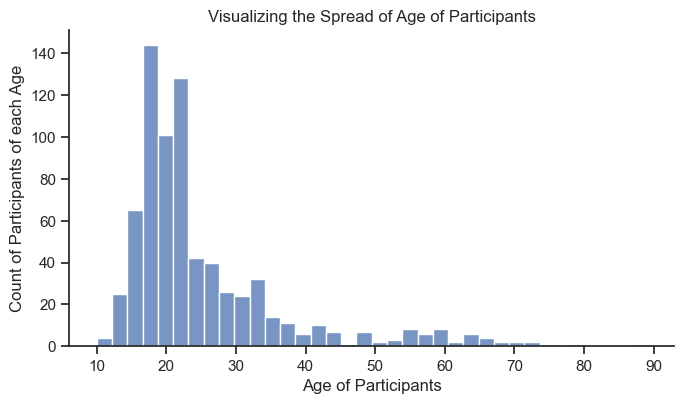

In [32]:
# First, let's visualize the Age column to see the spread of the age of people who partook in this survey

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")
plot1 = sns.displot(data=filterdrop, x="Age", palette='Set2', height=4, aspect=1.75)
plot1.set(xlabel="Age of Participants", ylabel="Count of Participants of each Age", title="Visualizing the Spread of Age of Participants") 
plot1.set_xlim(0, None)
plot1.set_ylim(0, None)

plot1

AttributeError: 'FacetGrid' object has no attribute 'set_xlim'

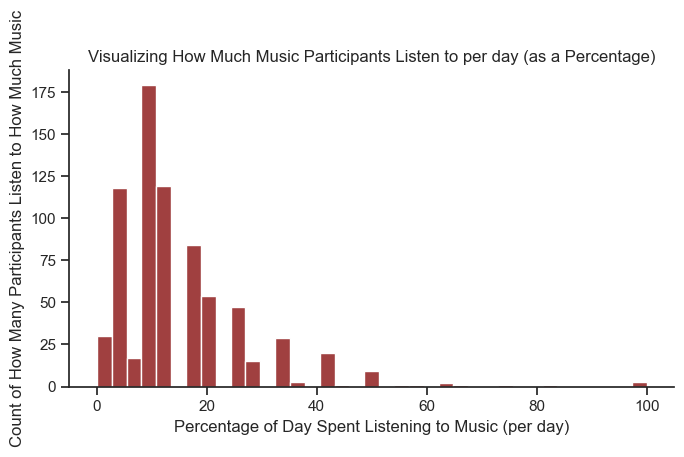

In [33]:
# Now, let's visualize the "Hours per day in %" column to see the spread of how much music the participants of this survey listen to per day

sns.set_theme(style="ticks")
plot2=sns.displot(data=filterdrop, x="Hours per day in %", color="maroon", height=4, aspect=1.75)
plot2.set(xlabel="Percentage of Day Spent Listening to Music (per day)", ylabel="Count of How Many Participants Listen to How Much Music", title="Visualizing How Much Music Participants Listen to per day (as a Percentage)") 
plot2.set_xlim(0, None)
plot2.set_ylim(0, None)

plot2

In [34]:
# Next, I want to express the four mental health columns, "Anxiety", "Depression", "Insomnia", and "OCD", as an overall mental health column, and give its values as a number out of 100:

filterdrop['Overall Mental Health (out of 100)'] = (filterdrop['Anxiety'] + filterdrop['Depression'] + filterdrop['Insomnia'] + filterdrop['OCD'])*2.5
filterdrop

C:\Users\12508\AppData\Local\Temp\ipykernel_9676\3429020136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterdrop['Overall Mental Health (out of 100)'] = (filterdrop['Anxiety'] + filterdrop['Depression'] + filterdrop['Insomnia'] + filterdrop['OCD'])*2.5


,Age,Hours per day,Anxiety,Depression,Insomnia,OCD,Hours per day in %,Overall Mental Health (out of 100)
0,18.0,3.0,3.0,0.0,1.0,0.0,12.500000,10.0
1,63.0,1.5,7.0,2.0,2.0,1.0,6.250000,30.0
2,18.0,4.0,7.0,7.0,10.0,2.0,16.666667,65.0
3,61.0,2.5,9.0,7.0,3.0,3.0,10.416667,55.0
4,18.0,4.0,7.0,2.0,5.0,9.0,16.666667,57.5
...,...,...,...,...,...,...,...,...
731,17.0,2.0,7.0,6.0,0.0,9.0,8.333333,55.0
732,18.0,1.0,3.0,2.0,2.0,5.0,4.166667,30.0
733,19.0,6.0,2.0,2.0,2.0,2.0,25.000000,20.0
734,19.0,5.0,2.0,3.0,2.0,1.0,20.833333,20.0


In [35]:
# Now, I  can start generating multiple tables to aid with visualizations 

df1 = filterdrop[["Hours per day in %", "Anxiety"]]
df1

,Hours per day in %,Anxiety
0,12.500000,3.0
1,6.250000,7.0
2,16.666667,7.0
3,10.416667,9.0
4,16.666667,7.0
...,...,...
731,8.333333,7.0
732,4.166667,3.0
733,25.000000,2.0
734,20.833333,2.0


In [36]:
df2 = filterdrop[["Hours per day in %", "Depression"]]
df2

,Hours per day in %,Depression
0,12.500000,0.0
1,6.250000,2.0
2,16.666667,7.0
3,10.416667,7.0
4,16.666667,2.0
...,...,...
731,8.333333,6.0
732,4.166667,2.0
733,25.000000,2.0
734,20.833333,3.0


In [37]:
df3 = filterdrop[["Hours per day in %", "Insomnia"]]
df3

,Hours per day in %,Insomnia
0,12.500000,1.0
1,6.250000,2.0
2,16.666667,10.0
3,10.416667,3.0
4,16.666667,5.0
...,...,...
731,8.333333,0.0
732,4.166667,2.0
733,25.000000,2.0
734,20.833333,2.0


In [39]:
df4 = filterdrop[["Hours per day in %", "OCD"]]
df4

,Hours per day in %,OCD
0,12.500000,0.0
1,6.250000,1.0
2,16.666667,2.0
3,10.416667,3.0
4,16.666667,9.0
...,...,...
731,8.333333,9.0
732,4.166667,5.0
733,25.000000,2.0
734,20.833333,1.0


In [40]:
df5 = filterdrop[["Hours per day in %", "Overall Mental Health (out of 100)"]]
df5

,Hours per day in %,Overall Mental Health (out of 100)
0,12.500000,10.0
1,6.250000,30.0
2,16.666667,65.0
3,10.416667,55.0
4,16.666667,57.5
...,...,...
731,8.333333,55.0
732,4.166667,30.0
733,25.000000,20.0
734,20.833333,20.0


In [41]:
df6 = filterdrop[["Age", "Anxiety"]]
df6

,Age,Anxiety
0,18.0,3.0
1,63.0,7.0
2,18.0,7.0
3,61.0,9.0
4,18.0,7.0
...,...,...
731,17.0,7.0
732,18.0,3.0
733,19.0,2.0
734,19.0,2.0


In [42]:
df7 = filterdrop[["Age", "Depression"]]
df7

,Age,Depression
0,18.0,0.0
1,63.0,2.0
2,18.0,7.0
3,61.0,7.0
4,18.0,2.0
...,...,...
731,17.0,6.0
732,18.0,2.0
733,19.0,2.0
734,19.0,3.0


In [43]:
df8 = filterdrop[["Age", "Insomnia"]]
df8

,Age,Insomnia
0,18.0,1.0
1,63.0,2.0
2,18.0,10.0
3,61.0,3.0
4,18.0,5.0
...,...,...
731,17.0,0.0
732,18.0,2.0
733,19.0,2.0
734,19.0,2.0


In [44]:
df9 = filterdrop[["Age", "OCD"]]
df9

,Age,OCD
0,18.0,0.0
1,63.0,1.0
2,18.0,2.0
3,61.0,3.0
4,18.0,9.0
...,...,...
731,17.0,9.0
732,18.0,5.0
733,19.0,2.0
734,19.0,1.0


In [45]:
df10 = filterdrop[["Age", "Overall Mental Health (out of 100)"]]
df10

,Age,Overall Mental Health (out of 100)
0,18.0,10.0
1,63.0,30.0
2,18.0,65.0
3,61.0,55.0
4,18.0,57.5
...,...,...
731,17.0,55.0
732,18.0,30.0
733,19.0,20.0
734,19.0,20.0


<AxesSubplot:title={'center':'Correlation of % of day spend listening to music and Overall mental health problems'}, xlabel='Percentage of day spent listening to music', ylabel='Overall Mental Health Problems of Participants (in %)'>

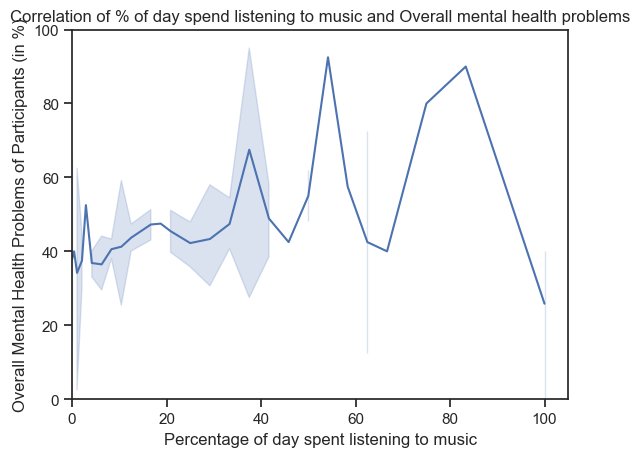

In [46]:
# Now that all 10 graphs are made, let's make visualizations from graph 5 and graph 10, to visualize the correlation between their respective columns

sns.set_theme(style="ticks")
plot3=sns.lineplot(data=df5, x="Hours per day in %", y="Overall Mental Health (out of 100)")
plot3.set(xlabel="Percentage of day spent listening to music", ylabel="Overall Mental Health Problems of Participants (in %)", title="Correlation of % of day spend listening to music and Overall mental health problems") 
plot3.set_xlim(0, None)
plot3.set_ylim(0, 100)

plot3


<AxesSubplot:title={'center':'Correlation of Age and Overall mental health problems'}, xlabel='Age of Participants', ylabel='Overall Mental Health Problems of Participants (in %)'>

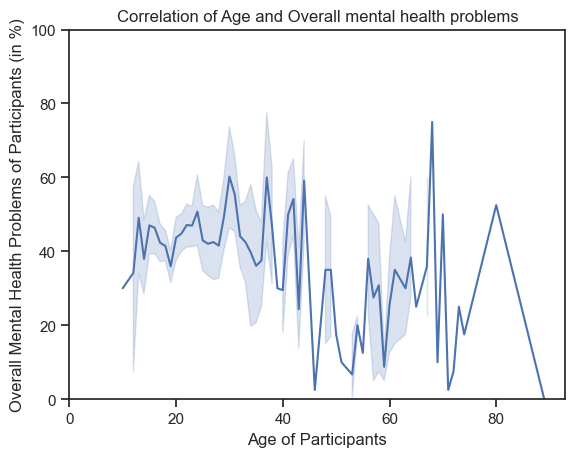

In [47]:
sns.set_theme(style="ticks")
plot4=sns.lineplot(data=df10, x="Age", y="Overall Mental Health (out of 100)")
plot4.set(xlabel="Age of Participants", ylabel="Overall Mental Health Problems of Participants (in %)", title="Correlation of Age and Overall mental health problems") 
plot4.set_xlim(0, None)
plot4.set_ylim(0, 100)

plot4


My research questions revolve around trying to learn if there is correlation between an individual's age and their mental health, and between the amount of music they listen to and their mental health; if so, I am curious which factor has a stronger correlation with mental health?

Plots 3 and 4 both utilized lineplots to roughly visualize how either amount of music or age correlate to overall mental health problems. Plot 3 shows that listening to more music and increased mental health problems had a correlation, although the highest amount of music listened to led to a decrease in mental health problems. Overall, this graph shows many ups and downs, so more complex visualizations will likely be needed to better understand the correlation.
Plot 4 showed an overall decline in overall mental health problems at older ages, suggesting a possible negative correlation between the two variables. However, a flaw comes from the popular phrase that "correlation does not imply causation"; is it really the increase in age that leads to reduced mental health problems? Overall, applying more complex visualizations to this graph to better illustrate the negative correlation may be helpful, and of course realistically no conclusions can be made just from this dataset; future studies would be needed to observe the true cause(s) of any correlation observed.

Perhaps for the next steps, I will use a jointplot for better illustrations. 
Also, I now realize that perhaps analyzing mental health as a whole using the "Overall Mental Health" column may not be very transparent. Thus, for my next steps I am planning to visualize each mental health column (Anxiety, Depression, Insomnia, and OCD) with Age and with Amount of music listened to, to figure out how those correlate, and then I will display those via a Facet plot to better see which variables have the strongest correlations. As for creation of new columns or more data aggregation, I don't feel that is further needed at this point. 

Plots 1 and 2 were used to visualize the spread of the age and amount of music listened to by the participants of the survey, and they indicated that the highest prevalence was of individuals aged just less than 20, and most individuals listened to music for about 10% of their day. I am now considering making graphs to show a relationship between these two variables as well, to see if there is any correlation between these two, as that could be interesting to know as well. 

### Revised Research Questions: 

**Do either an individual’s age or the amount of music they listen to have an effect on their mental health; which one has a stronger correlation with mental health problems?**

**How does quantity of music listening vary across age groups?**

# **Project Milestone 4**

## Task 1: Analysis Pipeline

In [48]:
# Loading data: 
dataset1 = pd.read_csv('../data/raw/music_therapy_and_mental_health_survey_results (1).csv') 
dataset

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [49]:
# Let's check the file type of the dataset
import os
import mimetypes as mmt

filename = "music_therapy_and_mental_health_survey_results (1).csv"
filetype = mmt.guess_type(filename)[0]

if filetype is not None:
    print(f"The file type of this file is: {filetype}")
else:
    print(f"Was not able to successfully determine the file type of '{filename}'")

The file type of this file is: application/vnd.ms-excel


In [50]:
# Let's check which columns I have, so I can delete columns accordingly
dataset1.columns.values

array(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]',
       'Frequency [Video game music]', 'Anxiety', 'Depression',
       'Insomnia', 'OCD', 'Music effects', 'Permissions'], dtype=object)

In [51]:
# Time to clean data. Let's drop the columns I'm not interested in
filtered1 = dataset1.drop(columns=['Timestamp', 'While working', 'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]', 'Music effects', 'Permissions'])
filtered1

,Age,Primary streaming service,Hours per day,Anxiety,Depression,Insomnia,OCD
0,18.0,Spotify,3.0,3.0,0.0,1.0,0.0
1,63.0,Pandora,1.5,7.0,2.0,2.0,1.0
2,18.0,Spotify,4.0,7.0,7.0,10.0,2.0
3,61.0,YouTube Music,2.5,9.0,7.0,3.0,3.0
4,18.0,Spotify,4.0,7.0,2.0,5.0,9.0
...,...,...,...,...,...,...,...
731,17.0,Spotify,2.0,7.0,6.0,0.0,9.0
732,18.0,Spotify,1.0,3.0,2.0,2.0,5.0
733,19.0,Other streaming service,6.0,2.0,2.0,2.0,2.0
734,19.0,Spotify,5.0,2.0,3.0,2.0,1.0


In [52]:
# Let's check if any of the rows are "incorrect"- aka, if they have missing data. For this, let's count the sum of missing responses (NaN/null) in each column
filtered1.isnull().sum()

Age                          1
Primary streaming service    1
Hours per day                0
Anxiety                      0
Depression                   0
Insomnia                     0
OCD                          0
dtype: int64

In [53]:
# Both the "Age" and "Primary streaming service" columns have 1 row with missing data, so let's delete those rows:
filterdrop1 = filtered1.dropna(subset=['Age', 'Primary streaming service'])
filterdrop1

,Age,Primary streaming service,Hours per day,Anxiety,Depression,Insomnia,OCD
0,18.0,Spotify,3.0,3.0,0.0,1.0,0.0
1,63.0,Pandora,1.5,7.0,2.0,2.0,1.0
2,18.0,Spotify,4.0,7.0,7.0,10.0,2.0
3,61.0,YouTube Music,2.5,9.0,7.0,3.0,3.0
4,18.0,Spotify,4.0,7.0,2.0,5.0,9.0
...,...,...,...,...,...,...,...
731,17.0,Spotify,2.0,7.0,6.0,0.0,9.0
732,18.0,Spotify,1.0,3.0,2.0,2.0,5.0
733,19.0,Other streaming service,6.0,2.0,2.0,2.0,2.0
734,19.0,Spotify,5.0,2.0,3.0,2.0,1.0


In [54]:
# Time to process my data! Let's convert all data to float numbers first (for ease); let's check data type of each column first:
print(filterdrop1.dtypes)

Age                          float64
Primary streaming service     object
Hours per day                float64
Anxiety                      float64
Depression                   float64
Insomnia                     float64
OCD                          float64
dtype: object


In [55]:
type('Primary streaming service')

str

In [56]:
# Hmm, all columns are floats except "Primary streaming service" which is an object (string), so let's convert all strings to numbers using a function and make a new column where this column's values are expressed as numbers:

filterdrop1['Primary streaming service'].unique()

array(['Spotify', 'Pandora', 'YouTube Music',
       'I do not use a streaming service.', 'Apple Music',
       'Other streaming service'], dtype=object)

In [70]:
# Here's the function 
def Primarystreamingservice(x):
    '''
    This function analyzes the given primary streaming service type, and assigns it a numerical value accordingly (numbers are easier to work with).
    '''
    if x['Primary streaming service']=="Spotify":
        return "1"
    elif x['Primary streaming service']=="Pandora": 
        return "2"  
    elif x['Primary streaming service']=="YouTube Music":
        return "3"
    elif x['Primary streaming service']=="Apple Music": 
        return "4"  
    elif x['Primary streaming service']=="I do not use a streaming service.":
        return "5"
    else: 
        return "6"  


In [71]:
filterdrop1['Primary streaming service in numbers']= filterdrop1.apply(Primarystreamingservice, axis='columns')
filterdrop1

,Age,Primary streaming service,Primary streaming service in numbers,Hours per day in %,Anxiety,Depression,Insomnia,OCD,Overall Mental Health (out of 100)
0,18.0,Spotify,1,12.500000,3.0,0.0,1.0,0.0,10.0
1,63.0,Pandora,2,6.250000,7.0,2.0,2.0,1.0,30.0
2,18.0,Spotify,1,16.666667,7.0,7.0,10.0,2.0,65.0
3,61.0,YouTube Music,3,10.416667,9.0,7.0,3.0,3.0,55.0
4,18.0,Spotify,1,16.666667,7.0,2.0,5.0,9.0,57.5
...,...,...,...,...,...,...,...,...,...
731,17.0,Spotify,1,8.333333,7.0,6.0,0.0,9.0,55.0
732,18.0,Spotify,1,4.166667,3.0,2.0,2.0,5.0,30.0
733,19.0,Other streaming service,6,25.000000,2.0,2.0,2.0,2.0,20.0
734,19.0,Spotify,1,20.833333,2.0,3.0,2.0,1.0,20.0


In [72]:
# Now we shoud be able to convert the 'Primary streaming service in numbers' column to the float type successfully 
filterdrop1['Primary streaming service in numbers'] = filterdrop1['Primary streaming service in numbers'].astype(float)
filterdrop1.dtypes

Age                                     float64
Primary streaming service                object
Primary streaming service in numbers    float64
Hours per day in %                      float64
Anxiety                                 float64
Depression                              float64
Insomnia                                float64
OCD                                     float64
Overall Mental Health (out of 100)      float64
dtype: object

In [73]:
# Great, now that that's done, I want to manipulate the "Hours per day" column, by expressing it as a percentage
filterdrop1['Hours per day in %'] = filterdrop1['Hours per day'] / 24 * 100
filterdrop1 = filterdrop1.drop('Hours per day', axis="columns")
filterdrop1 

KeyError: 'Hours per day'

In [74]:
# In our processing journey, I think checking for outliers is important. Let's run the describe code:
filterdrop1.describe(include=np.number).T 

,count,mean,std,min,25%,50%,75%,max
Age,734.0,25.212534,12.062188,10.0,18.000000,21.0,28.000000,89.0
Primary streaming service in numbers,734.0,2.207084,1.717625,1.0,1.000000,1.0,3.000000,6.0
Hours per day in %,734.0,14.881642,12.632479,0.0,8.333333,12.5,20.833333,100.0
Anxiety,734.0,5.829019,2.791967,0.0,4.000000,6.0,8.000000,10.0
Depression,734.0,4.794278,3.029963,0.0,2.000000,5.0,7.000000,10.0
Insomnia,734.0,3.733651,3.086117,0.0,1.000000,3.0,6.000000,10.0
OCD,734.0,2.625341,2.836728,0.0,0.000000,2.0,4.000000,10.0
Overall Mental Health (out of 100),734.0,42.455722,20.652155,0.0,27.500000,42.5,57.500000,97.5


In [75]:
# Mental health rankings are subjective, so I will not delete any outliers here. Age values look appropriate. The remaining two columns are alright too; for "hours per day in %", 100% is quite high but perhaps this individual has music playing 24/7, even during sleep? We can keep it just to see if any interesting trends are observed
# Next, I want to add a new column that is a sum of all four of the mental health columns. This column will include values as a number out of 100
filterdrop1['Overall Mental Health (out of 100)'] = (filterdrop1['Anxiety'] + filterdrop1['Depression'] + filterdrop1['Insomnia'] + filterdrop1['OCD'])*2.5
filterdrop1

,Age,Primary streaming service,Primary streaming service in numbers,Hours per day in %,Anxiety,Depression,Insomnia,OCD,Overall Mental Health (out of 100)
0,18.0,Spotify,1.0,12.500000,3.0,0.0,1.0,0.0,10.0
1,63.0,Pandora,2.0,6.250000,7.0,2.0,2.0,1.0,30.0
2,18.0,Spotify,1.0,16.666667,7.0,7.0,10.0,2.0,65.0
3,61.0,YouTube Music,3.0,10.416667,9.0,7.0,3.0,3.0,55.0
4,18.0,Spotify,1.0,16.666667,7.0,2.0,5.0,9.0,57.5
...,...,...,...,...,...,...,...,...,...
731,17.0,Spotify,1.0,8.333333,7.0,6.0,0.0,9.0,55.0
732,18.0,Spotify,1.0,4.166667,3.0,2.0,2.0,5.0,30.0
733,19.0,Other streaming service,6.0,25.000000,2.0,2.0,2.0,2.0,20.0
734,19.0,Spotify,1.0,20.833333,2.0,3.0,2.0,1.0,20.0


In [76]:
# Next, I will change the order of the columns
filterdrop1 = filterdrop1.loc[:, ['Age', 'Primary streaming service', 'Primary streaming service in numbers', 'Hours per day in %', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Overall Mental Health (out of 100)']]
filterdrop1

,Age,Primary streaming service,Primary streaming service in numbers,Hours per day in %,Anxiety,Depression,Insomnia,OCD,Overall Mental Health (out of 100)
0,18.0,Spotify,1.0,12.500000,3.0,0.0,1.0,0.0,10.0
1,63.0,Pandora,2.0,6.250000,7.0,2.0,2.0,1.0,30.0
2,18.0,Spotify,1.0,16.666667,7.0,7.0,10.0,2.0,65.0
3,61.0,YouTube Music,3.0,10.416667,9.0,7.0,3.0,3.0,55.0
4,18.0,Spotify,1.0,16.666667,7.0,2.0,5.0,9.0,57.5
...,...,...,...,...,...,...,...,...,...
731,17.0,Spotify,1.0,8.333333,7.0,6.0,0.0,9.0,55.0
732,18.0,Spotify,1.0,4.166667,3.0,2.0,2.0,5.0,30.0
733,19.0,Other streaming service,6.0,25.000000,2.0,2.0,2.0,2.0,20.0
734,19.0,Spotify,1.0,20.833333,2.0,3.0,2.0,1.0,20.0


## Task 2: Method Chaining

In [77]:
# Step 1: Let's make a method chain using all the main codes run above in Task 2 of this milestone

datasetchain = pd.read_csv('../data/raw/music_therapy_and_mental_health_survey_results (1).csv') \
                .drop(columns=['Timestamp', 'While working', 'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]', 'Music effects', 'Permissions']) \
                .dropna(subset=['Age', 'Primary streaming service']) \
                .assign(Primary_streaming_service_in_numbers=lambda x: x.apply(Primarystreamingservice, axis="columns")) \
                .assign(Primary_streaming_service_in_numbers_float=lambda x: x['Primary_streaming_service_in_numbers'].astype(float)) \
                .assign(Hours_per_day_percentage=lambda x: x['Hours per day']/24 * 100) \
                .assign(Overall_Mental_Health_out_of_100=lambda x: (x['Anxiety'] + x['Depression'] + x['Insomnia'] + x['OCD'])*2.5) \
                .loc[:, ['Age', 'Primary streaming service', 'Primary_streaming_service_in_numbers', 'Hours_per_day_percentage', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Overall_Mental_Health_out_of_100']]
datasetchain

,Age,Primary streaming service,Primary_streaming_service_in_numbers,Hours_per_day_percentage,Anxiety,Depression,Insomnia,OCD,Overall_Mental_Health_out_of_100
0,18.0,Spotify,1,12.500000,3.0,0.0,1.0,0.0,10.0
1,63.0,Pandora,2,6.250000,7.0,2.0,2.0,1.0,30.0
2,18.0,Spotify,1,16.666667,7.0,7.0,10.0,2.0,65.0
3,61.0,YouTube Music,3,10.416667,9.0,7.0,3.0,3.0,55.0
4,18.0,Spotify,1,16.666667,7.0,2.0,5.0,9.0,57.5
...,...,...,...,...,...,...,...,...,...
731,17.0,Spotify,1,8.333333,7.0,6.0,0.0,9.0,55.0
732,18.0,Spotify,1,4.166667,3.0,2.0,2.0,5.0,30.0
733,19.0,Other streaming service,6,25.000000,2.0,2.0,2.0,2.0,20.0
734,19.0,Spotify,1,20.833333,2.0,3.0,2.0,1.0,20.0


In [65]:
# Step 2: Wow, that method chain took embarassingly long... okay, now let's put that method chain into a function called "MCfunction"   

def load_and_process(url_or_path_to_csv_file):

    # Method Chain 1 (Load data and deal with missing data)

    datasetchain1 = (
                pd.read_csv('../data/raw/music_therapy_and_mental_health_survey_results (1).csv') \
                .drop(columns=['Timestamp', 'While working', 'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]', 'Music effects', 'Permissions']) \
                .dropna(subset=['Age', 'Primary streaming service']) 
    )

    # Method Chain 2 (Create new columns, drop others, and do processing)

    datasetchain2 = (
          datasetchain1
            .assign(Primary_streaming_service_in_numbers=lambda x: x.apply(Primarystreamingservice, axis="columns")) \
            .assign(Primary_streaming_service_in_numbers_float=lambda x: x['Primary_streaming_service_in_numbers'].astype(float)) \
            .assign(Hours_per_day_percentage=lambda x: x['Hours per day']/24 * 100) \
            .assign(Overall_Mental_Health_out_of_100=lambda x: (x['Anxiety'] + x['Depression'] + x['Insomnia'] + x['OCD'])*2.5) \
            .loc[:, ['Age', 'Primary streaming service', 'Primary_streaming_service_in_numbers', 'Hours_per_day_percentage', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Overall_Mental_Health_out_of_100']]
    
    )

    # Make sure to return the latest dataframe

    return datasetchain2 


In [78]:
# Let's run the function... I really hope it works
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

datasetchain2 = load_and_process('../data/raw/music_therapy_and_mental_health_survey_results (1).csv')
datasetchain2

,Age,Primary streaming service,Primary_streaming_service_in_numbers,Hours_per_day_percentage,Anxiety,Depression,Insomnia,OCD,Overall_Mental_Health_out_of_100
0,18.0,Spotify,1,12.500000,3.0,0.0,1.0,0.0,10.0
1,63.0,Pandora,2,6.250000,7.0,2.0,2.0,1.0,30.0
2,18.0,Spotify,1,16.666667,7.0,7.0,10.0,2.0,65.0
3,61.0,YouTube Music,3,10.416667,9.0,7.0,3.0,3.0,55.0
4,18.0,Spotify,1,16.666667,7.0,2.0,5.0,9.0,57.5
...,...,...,...,...,...,...,...,...,...
731,17.0,Spotify,1,8.333333,7.0,6.0,0.0,9.0,55.0
732,18.0,Spotify,1,4.166667,3.0,2.0,2.0,5.0,30.0
733,19.0,Other streaming service,6,25.000000,2.0,2.0,2.0,2.0,20.0
734,19.0,Spotify,1,20.833333,2.0,3.0,2.0,1.0,20.0


In [82]:
# Step 3: 
import scripts
from scripts import project_functions_Zainab as pt 

df12 = pt.load_and_process('../data/raw/music_therapy_and_mental_health_survey_results (1).csv')
df12

NameError: name 'Primarystreamingservice' is not defined

## Task 3: Visualizations & Analysis

Let's make a more complex visualization to compare hours spent listening to music per day and overall mental health. I will use a jointplot: 

In [ ]:
plot5 = sns.jointplot(data=df5, x="Hours per day in %", y="Overall Mental Health (out of 100)", kind="kde") 
plot5.ax_joint.set_xlabel('Percentage of day spent listening to music', fontweight='bold')
plot5.ax_joint.set_ylabel('Overall Mental Health Problems of Participants (in %)', fontweight='bold')
plot5.fig.suptitle('Correlation of % of day spent listening to music and Overall mental health problems')
plot5

Interesting, it seems like most of the survey individuals listened to music for about 10% of the day, and the highest density of the plot is at about 25-45 for the y-axis, indicating that most of the survey-takers feel their mental health problems are relatively low, at about 35%. As for a trend, it seems there may be a **minimal effect of "percentage of day spent listening to music" on overall mental health problems**, as seen by the relatively equal scattering of points in a straight vertical manner on the graph (the vertical direction representing how different survey-takers ranked their mental health all over across the scale for a given "% of day spent listening to music", indicating that listening to music for a certain amount of time does not seem to cause more or less mental health problems). 

Next, let's make a more complex visualization to compare age and overall mental health. I will use a jointplot again: 

In [ ]:
plot6 = sns.jointplot(data=df10, x="Age", y="Overall Mental Health (out of 100)", kind="kde")
plot6.ax_joint.set_xlabel('Age of Participants (in Years)', fontweight='bold')
plot6.ax_joint.set_ylabel('Overall Mental Health Problems of Participants (in %)', fontweight='bold')
plot6.fig.suptitle('Correlation of Age and Overall mental health problems')
plot6

Interesting, it seems like most of the survey individuals were younger folks, and the highest density of the plot is at about 40 and 55, meaning these were the most common "Overall health" percentages. 
More importantly, for trends, it seems there may be a minimal effect of **"Age of Participants" on overall mental health problems**, as seen by the relatively equal scattering of points in a straight vertical manner on the graph (representing the relatively equal spread of overall mental health problems percentages for a given age, indicating that being a certain age does not lead to less or more mental health problems). However, as age increases, it can be seen that more points are towards the lower end of the spectrum of "Overall Mental Healthy Problems"- which indicates that **as the age of a human increases, their mental health improves**. Further studies need to be done to confirm this conclusion.


Next, let's visualize each mental health condition (4) with either "Age" or "% of day spent listening to music"- there will be 8 jointplots ahead:

In [ ]:
plotone = sns.jointplot(data=df1, x="Hours per day in %", y="Anxiety", kind="hex", color='crimson')
plotone.ax_joint.set_xlabel('Percentage of day spent listening to music', fontweight='bold')
plotone.ax_joint.set_ylabel('Anxiety in Participants (out of 10)', fontweight='bold')
plotone.fig.suptitle('Correlation of % of day spent listening to music and Anxiety')
plotone

In [ ]:
plottwo = sns.jointplot(data=df2, x="Hours per day in %", y="Depression", kind="hex", color='crimson')
plottwo.ax_joint.set_xlabel('Percentage of day spent listening to music', fontweight='bold')
plottwo.ax_joint.set_ylabel('Depression in Participants (out of 10)', fontweight='bold')
plottwo.fig.suptitle('Correlation of % of day spent listening to music and Depression')
plottwo

In [ ]:
plotthree = sns.jointplot(data=df3, x="Hours per day in %", y="Insomnia", kind="hex", color='crimson')
plotthree.ax_joint.set_xlabel('Percentage of day spent listening to music', fontweight='bold')
plotthree.ax_joint.set_ylabel('Insomnia in Participants (out of 10)', fontweight='bold')
plotthree.fig.suptitle('Correlation of % of day spent listening to music and Insomnia')
plotthree

In [ ]:
plotfour = sns.jointplot(data=df4, x="Hours per day in %", y="OCD", kind="hex", color='crimson')
plotfour.ax_joint.set_xlabel('Percentage of day spent listening to music', fontweight='bold')
plotfour.ax_joint.set_ylabel('OCD in Participants (out of 10)', fontweight='bold')
plotfour.fig.suptitle('Correlation of % of day spent listening to music and OCD')
plotfour


In [ ]:
plotsix = sns.jointplot(data=df6, x="Age", y="Anxiety", kind="hex", color='seagreen')
plotsix.ax_joint.set_xlabel('Age of Participants (in Years)', fontweight='bold')
plotsix.ax_joint.set_ylabel('Anxiety in Participants (out of 10)', fontweight='bold')
plotsix.fig.suptitle('Correlation of Age and Anxiety')
plotsix

In [ ]:
plotseven = sns.jointplot(data=df7, x="Age", y="Depression", kind="hex", color='seagreen')
plotseven.ax_joint.set_xlabel('Age of Participants (in Years)', fontweight='bold')
plotseven.ax_joint.set_ylabel('Depression in Participants (out of 10)', fontweight='bold')
plotseven.fig.suptitle('Correlation of Age and Depression')
plotseven


In [ ]:
ploteight = sns.jointplot(data=df8, x="Age", y="Insomnia", kind="hex", color='seagreen')
ploteight.ax_joint.set_xlabel('Age of Participants (in Years)', fontweight='bold')
ploteight.ax_joint.set_ylabel('Insomnia in Participants (out of 10)', fontweight='bold')
ploteight.fig.suptitle('Correlation of Age and Insomnia') 
ploteight

In [ ]:
plotnine = sns.jointplot(data=df9, x="Age", y="OCD", kind="hex", color='seagreen')
plotnine.ax_joint.set_xlabel('Age of Participants (in Years)', fontweight='bold')
plotnine.ax_joint.set_ylabel('OCD in Participants (out of 10)', fontweight='bold')
plotnine.fig.suptitle('Correlation of Age and OCD')
plotnine

With these new graphs, there are still no prominently significant effects of "% of music listened to in a day" on each of the four mental health conditions; it appears that the prevalence of the mental health problems are similar regardless of if individuals are listening to more or less music. Therefore, **it may be concluded from these results that amount of music listened to in a day and the various mental health conditions do not have a correlation**.  

For age and its correlation to mental health, age seems to have minimal effects on the mental health conditions Anxiety and Insomnia. However, the "Correlation of Age and OCD" and especially the "Correlation of Age and Depression" graphs both display how with increasing age, the overall ranking of OCD and Depression was lower. **This data allows us to conclude that increasing age may have a negative correlation with age, such that higher age leads to lower depression and OCD**.

**Therefore, it can finally be stated that an individual’s age has a stronger correlation with certain mental health conditions- depression and insomnia, than does the amount of music they listen to.**

To test my second question, "**How does quantity of music listening vary across age groups?**", I will plot a Facet Grid with histoplots, as well as a jointplot:

In [ ]:
plotfacet1 = sns.FacetGrid(filterdrop, col="Age", col_wrap=7, height=2)
plotfacet1.map(sns.histplot, "Hours per day in %", color="coral", edgecolor="Black")

In [ ]:
q2 = sns.jointplot(data=filterdrop, x="Age", y="Hours per day in %", kind="hex", color='coral')
q2.ax_joint.set_xlabel('Age of Participants (in Years)', fontweight='bold')
q2.ax_joint.set_ylabel('% of day spent listening to music', fontweight='bold')
q2.fig.suptitle('Correlation of Age and Music listening')
q2     

Based on the previous two visualizations, I can tackle the second question. The Facet Grid showed how the highest counts of music listening for people of ages 16, 17, especially 18, 19, 20, 21, 22, and 23. People aged 24-32 also listened to music, but less than the 16-23 year olds. People aged 33-38 have even lower counts, and people older than 38 have very low counts of music listeners. This data is generally supported by the jointplot, which shows the higest concentration of music listeners at age ~20, and gradually lower concentrations at higher ages; this is further supported by the bars on the joinplots too. 
Therefore, **it can be concluded that according to this dataset, younger people tend to listen to music more, and this activity decreases as age increases. More specifically, 16 is the peak age at which people listen to music the most**. It should be noted that there is possible bias in this conclusion, since majority of the survery-takers were younger. Further surveys of older populations can help remove the bias from this conclusion. 

## Additional questions

Since I have rather simple results, I can do further exploring. I have another question: **How many hours of music do most individuals usually listen to in a day?**  

I will create a Facet grid using histplots to observe what the most common number of hours of music listened to in a day popular 

In [ ]:
plotfacet2 = sns.FacetGrid(filterdrop, col="Hours per day", col_wrap=9, height=2)
plotfacet2.map(sns.histplot, "Overall Mental Health (out of 100)", color="#aa3e66", edgecolor="Black")

Based on the survery-takers, these number of hours of music were most common: 1.0, 2.0, and 3.0. From these three, 2.0 hours had the highest count. Therefore, this result can be extended to the general public, and it can be concluded that **in general, people typically spend two hours per day listening to music, which is the most common duration**. 

Next additional question: **Of the four mental health conditions, which one is the most problematic?**

For answering this question, I will create a boxplot that includes all four mental health conditions, and displays their numerical stats:

In [ ]:
sns.set_theme(style="ticks", palette="deep", font_scale=1.2)

sns.boxplot(data=filterdrop[['Anxiety', 'Depression', 'Insomnia', 'OCD']])
plt.xlabel("")
plt.ylabel("Mental Health Condition Ranking by Participants")
plt.title("Prevalence of Four Different Mental Health Conditions")
plt.show() 

The main result of the barplot above is that it shows the interquartile range (IQR) of the prevalence of each of the four mental health conditions in the survey-takers. A score of 0 indicates lack of the mental health condition, while a score of 10 indicates high levels of mental health condition. **The barplot shows that Anxiety has the highest IQR, meaning that overall, the survey-takers reported highest levels of this condition. Depression was ranked lower, insomnia even lower, and OCD was ranked the lowest**. This indicates that of these four mental health conditions, **anxiety is the most prevalent in our society, therefore more focus should be paid towards providing resources and therapy for this condition**, compared to the other three. 